In [3]:
#Get Model
%load_ext autoreload
%autoreload 2
import random
import argparse

# Third-party
import pytorch_lightning as pl
import torch
from lightning_fabric.utilities import seed

from neural_lam import utils
from neural_lam.models.graph_lam import GraphLAM
from neural_lam.models.hi_lam import HiLAM
from neural_lam.models.hi_lam_parallel import HiLAMParallel
from neural_lam.weather_dataset import WeatherDataset

import sys
sys.path.append("/home/aw1223/ip/agile/")


args = argparse.Namespace(
    dataset='meps_example',
    model='graph_lam',
    subset_ds=0,
    seed=42,
    n_workers=4,
    epochs=200,
    batch_size=1,
    load=None,
    restore_opt=0,
    precision=32,
    graph='1level',
    hidden_dim=32,
    hidden_layers=1,
    processor_layers=1,
    mesh_aggr='sum',
    output_std=0,
    ar_steps=1,
    control_only=0,
    loss='wmse',
    step_length=3,
    lr=0.001,
    val_interval=1,
    eval='test',
    n_example_pred=1
)


MODELS = {
    "graph_lam": GraphLAM,
    "hi_lam": HiLAM,
    "hi_lam_parallel": HiLAMParallel,
}

random_run_id = random.randint(0, 9999)
seed.seed_everything(args.seed)

max_pred_length = (65 // args.step_length) - 2  # 19

device_name = "cpu"

model_class = MODELS[args.model]


eval_loader = torch.utils.data.DataLoader(
    WeatherDataset(
        args.dataset,
        pred_length=max_pred_length,
        split="test",
        subsample_step=args.step_length,
        subset=bool(args.subset_ds),
    ),
    args.batch_size,
    shuffle=False,
    num_workers=args.n_workers,
)



#TODO change back to args?
model = GraphLAM(
            args.hidden_dim,
            args.hidden_layers,
            args.mesh_aggr,
            args.lr,
            args.dataset,
            args.output_std,
            args.loss, 
            args.step_length, 
            args.n_example_pred, 
            args.graph, 
            args.processor_layers
    )

Seed set to 42


Loaded graph with 70345 nodes (63784 grid, 6561 mesh)
Edges in subgraphs: m2m=51520, g2m=100656, m2g=255136


In [4]:
# import sys
# sys.path.append("/home/aw1223/ip/agile/")

# from imports.mase.src.chop.ir.graph.mase_graph import MaseGraph
# # /home/aw1223/ip/agile/imports/mase/src/chop/ir/graph/mase_graph.py

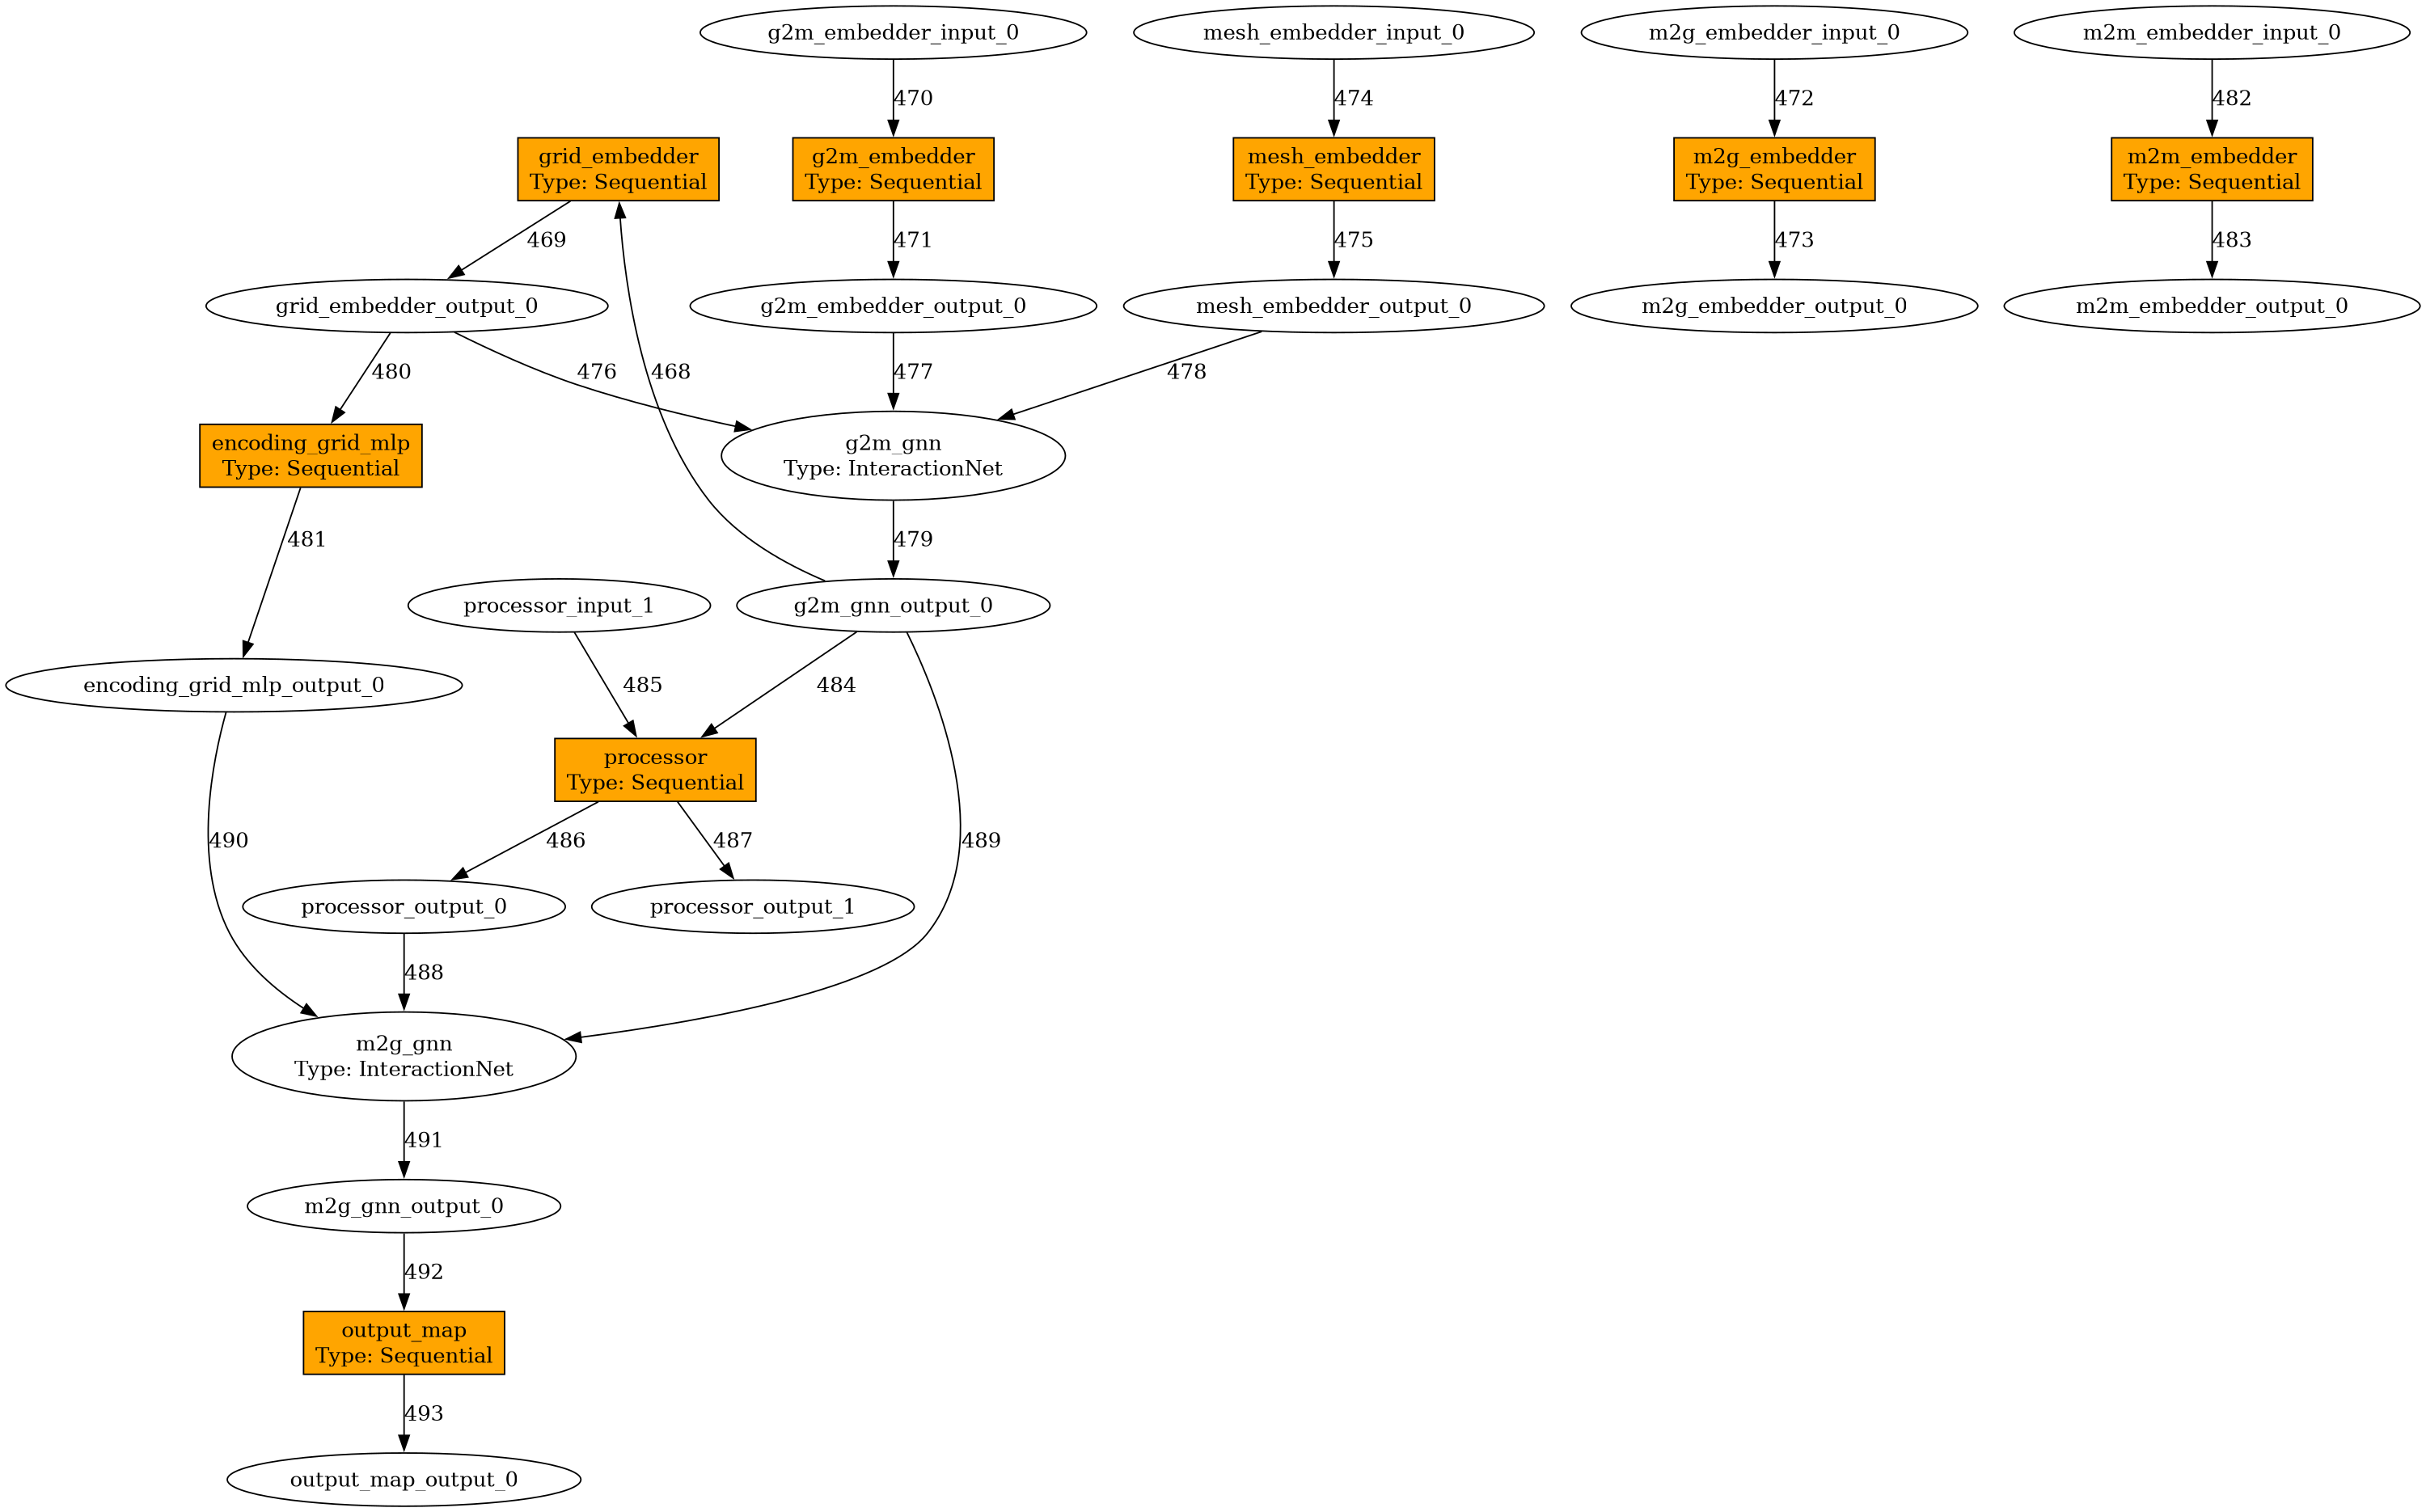

1it [00:00, 6278.90it/s]
1it [00:00, 8719.97it/s]
1it [00:00, 9279.43it/s]
1it [00:00, 9383.23it/s]


KeyError: 'meta'

In [5]:
from sdk.ample import Ample

#TODO Put graph and model in seperatley?
ample = Ample()
model_io = ample.compile(model, eval_loader = eval_loader, plot = True)

In [ ]:

# Iterate through the data loader
for data in eval_loader:
    # If the batch is a single graph
    if isinstance(data, torch_geometric.data.Data):
        edge_index = data.edge_index         # (2, num_edges)
        edge_attr = data.edge_attr           # (num_edges, num_edge_features) or None
        node_features = data.x               # (num_nodes, num_node_features)
        target = data.y                      # Target labels
        
        # If you need edge weights or other specific attributes
        if hasattr(data, 'edge_weight'):
            edge_weight = data.edge_weight   # (num_edges,)
        
        # Now you can use edge_index, edge_attr, etc. in your model
        print('Edge Index:', edge_index)
        print('Edge Attributes:', edge_attr)
        print('Node Features:', node_features)
        print('Target:', target)

    # If the batch contains multiple graphs (a batched graph)
    elif isinstance(data, torch_geometric.data.Batch):
        # Access batch information
        edge_index = data.edge_index
        edge_attr = data.edge_attr
        node_features = data.x
        target = data.y
        
        # The Batch object contains additional info like `batch`
        # which indicates the graph membership of each node
        batch = data.batch  # Node to graph assignment
        
        print('Edge Index:', edge_index)
        print('Edge Attributes:', edge_attr)
        print('Node Features:', node_features)
        print('Target:', target)
        print('Batch:', batch)


